## Spotify Song Popularity Prediction

Given *data about the top 50 Spotify songs from 2019+*, let's try to predict whether a given song will be **more or less popular**.

We will use five different classification models to make our predictions.

Data source: https://www.kaggle.com/datasets/leonardopena/top50spotify2019

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [3]:
data = pd.read_csv('archive/top50.csv', encoding='latin-1')
data

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


### Preprocessing

In [5]:
df = data.copy()

In [7]:
df = df.drop(['Unnamed: 0', 'Track.Name'], axis=1)

In [8]:
df

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [10]:
df['Popularity'] = pd.qcut(df['Popularity'], q=2, labels=[0, 1])

#### One-Hot Encoding

In [11]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [12]:
df = onehot_encode(df, 'Genre', 'genre')
df = onehot_encode(df, 'Artist.Name', 'artist')

In [13]:
df

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,...,artist_Post Malone,artist_ROSALÍA,artist_Sam Smith,artist_Sech,artist_Shawn Mendes,artist_Taylor Swift,artist_The Chainsmokers,artist_Tones and I,artist_Y2K,artist_Young Thug
0,117,55,76,-6,8,75,191,4,3,0,...,0,0,0,0,1,0,0,0,0,0
1,105,81,79,-4,8,61,302,8,9,1,...,0,0,0,0,0,0,0,0,0,0
2,190,80,40,-4,16,70,186,12,46,0,...,0,0,0,0,0,0,0,0,0,0
3,93,65,64,-8,8,55,198,12,19,0,...,0,0,0,0,0,0,0,0,0,0
4,150,65,58,-4,11,18,175,45,7,1,...,1,0,0,0,0,0,0,0,0,0
5,102,68,80,-5,9,84,220,9,4,0,...,0,0,0,0,0,0,0,0,0,0
6,180,64,75,-6,7,23,131,2,29,1,...,0,0,0,0,0,0,0,0,0,0
7,111,68,48,-5,8,35,202,15,9,1,...,0,0,1,0,0,0,0,0,0,0
8,136,62,88,-6,11,64,157,5,10,0,...,0,0,0,0,0,0,0,0,0,0
9,135,43,70,-11,10,56,194,33,38,1,...,0,0,0,0,0,0,0,0,0,0


#### Splitting and Scaling

In [14]:
y = df.loc[:, 'Popularity'].copy()
X = df.drop('Popularity', axis=1).copy()

In [15]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [16]:
X

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,genre_atl hip hop,...,artist_Post Malone,artist_ROSALÍA,artist_Sam Smith,artist_Sech,artist_Shawn Mendes,artist_Taylor Swift,artist_The Chainsmokers,artist_Tones and I,artist_Y2K,artist_Young Thug
0,-0.100040,-0.643061,0.391195,-0.167012,-0.605094,0.922595,-0.257029,-0.965719,-0.857964,-0.142857,...,-0.204124,-0.142857,-0.142857,-0.204124,4.898979,-0.142857,-0.204124,-0.142857,-0.142857,-0.142857
1,-0.492352,1.202367,0.645217,0.815412,-0.605094,0.289442,2.607453,-0.753006,-0.314949,-0.142857,...,-0.204124,-0.142857,-0.142857,-0.204124,-0.204124,-0.142857,-0.204124,-0.142857,-0.142857,-0.142857
2,2.286529,1.131389,-2.657075,0.815412,0.121746,0.696469,-0.386060,-0.540292,3.033644,-0.142857,...,-0.204124,-0.142857,-0.142857,-0.204124,-0.204124,-0.142857,-0.204124,-0.142857,-0.142857,-0.142857
3,-0.884665,0.066719,-0.624895,-1.149437,-0.605094,0.018090,-0.076386,-0.540292,0.590076,-0.142857,...,-0.204124,-0.142857,-0.142857,-0.204124,-0.204124,-0.142857,-0.204124,-0.142857,-0.142857,-0.142857
4,0.978820,0.066719,-1.132940,0.815412,-0.332529,-1.655245,-0.669927,1.214594,-0.495954,-0.142857,...,4.898979,-0.142857,-0.142857,-0.204124,-0.204124,-0.142857,-0.204124,-0.142857,-0.142857,-0.142857
5,-0.590431,0.279653,0.729891,0.324200,-0.514239,1.329623,0.491349,-0.699827,-0.767461,-0.142857,...,-0.204124,-0.142857,-0.142857,-0.204124,-0.204124,-0.142857,-0.204124,-0.142857,-0.142857,-0.142857
6,1.959602,-0.004259,0.306520,-0.167012,-0.695948,-1.429118,-1.805398,-1.072076,1.495102,-0.142857,...,-0.204124,-0.142857,-0.142857,-0.204124,-0.204124,-0.142857,-0.204124,-0.142857,-0.142857,-0.142857
7,-0.296196,0.279653,-1.979682,0.324200,-0.605094,-0.886415,0.026838,-0.380757,-0.314949,-0.142857,...,-0.204124,-0.142857,7.000000,-0.204124,-0.204124,-0.142857,-0.204124,-0.142857,-0.142857,-0.142857
8,0.521122,-0.146215,1.407284,-0.167012,-0.332529,0.425117,-1.134438,-0.912541,-0.224446,-0.142857,...,-0.204124,-0.142857,-0.142857,-0.204124,-0.204124,-0.142857,-0.204124,-0.142857,-0.142857,-0.142857
9,0.488429,-1.494796,-0.116850,-2.623073,-0.423384,0.063315,-0.179611,0.576454,2.309624,-0.142857,...,-0.204124,-0.142857,-0.142857,-0.204124,-0.204124,-0.142857,-0.204124,-0.142857,-0.142857,-0.142857


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)

### Modeling and Training

In [18]:
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dec_model = DecisionTreeClassifier()
mlp_model = MLPClassifier()
svm_model = SVC()

In [19]:
log_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dec_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
log_acc = log_model.score(X_test, y_test)
knn_acc = knn_model.score(X_test, y_test)
dec_acc = dec_model.score(X_test, y_test)
mlp_acc = mlp_model.score(X_test, y_test)
svm_acc = svm_model.score(X_test, y_test)

In [22]:
print("   Logistic Regression Accuracy: ", log_acc)
print("           K Neighbors Accuracy: ", knn_acc)
print("         Decision Tree Accuracy: ", dec_acc)
print("       Neural Networks Accuracy: ", mlp_acc)
print("Support Vector Machine Accuracy: ", svm_acc)

   Logistic Regression Accuracy:  0.7333333333333333
           K Neighbors Accuracy:  0.5333333333333333
         Decision Tree Accuracy:  0.4
       Neural Networks Accuracy:  0.6
Support Vector Machine Accuracy:  0.7333333333333333


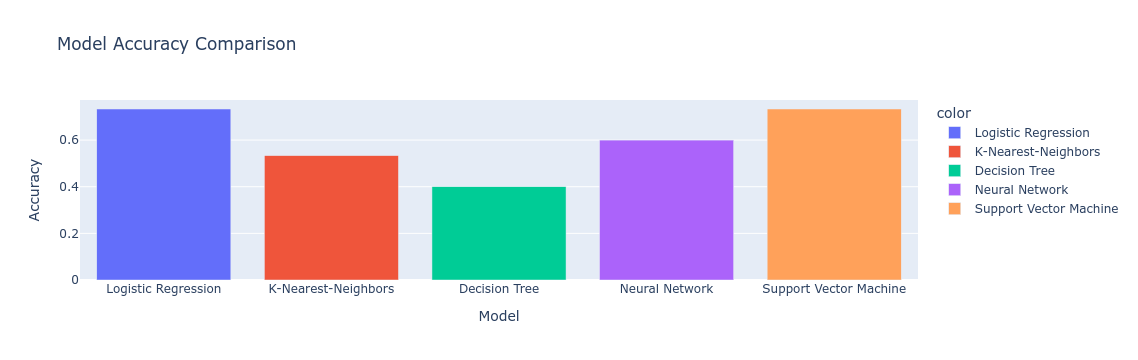

In [23]:
fig = px.bar(
    x = ['Logistic Regression', 'K-Nearest-Neighbors', 'Decision Tree', 'Neural Network', 'Support Vector Machine'],
    y = [log_acc, knn_acc, dec_acc, mlp_acc, svm_acc],
    color = ['Logistic Regression', 'K-Nearest-Neighbors', 'Decision Tree', 'Neural Network', 'Support Vector Machine'],
    labels = {'x': 'Model', 'y':'Accuracy'},
    title = 'Model Accuracy Comparison'
)

fig.show()